In [1]:
from pylab import *
from healpy import *
from py_lognormal_mocks import *

In [3]:
?lognormal_mocks_stats

Docstring:
This code takes means and cross-power spectra as inputs, then outputs means and cross-spectra for the Gaussianized fields gauss0 = log(map0), gauss1 = log(map1)

Parameters
----------
rhobar: mean densities
Cl: power spectrum of field
Ntheta: num of theta controls the accuracy of the intermediate correlations functions

Returns
-------
(gaussbar, Clgauss) : tuple, mean and overdensity of Gaussianized field
Type:      builtin_function_or_method


In [4]:
seed(329968)


Nobj = 20000


nside = 512
npix = 12*nside**2

Nl = 768

Ntheta = 2048



rhobar = array([float(Nobj)/npix])

print(rhobar)

[0.00635783]


In [5]:
l = arange(0.,Nl)
ClA = (l**0.5 * exp(-l**2/2./320.**2))*1e-10

In [6]:
Nmaps = rhobar.size
Cl = array([[ ClA ]])
Nl = Cl.shape[-1]

In [7]:
gaussbar, Clgauss = lognormal_mocks_stats(rhobar,Cl,Ntheta)

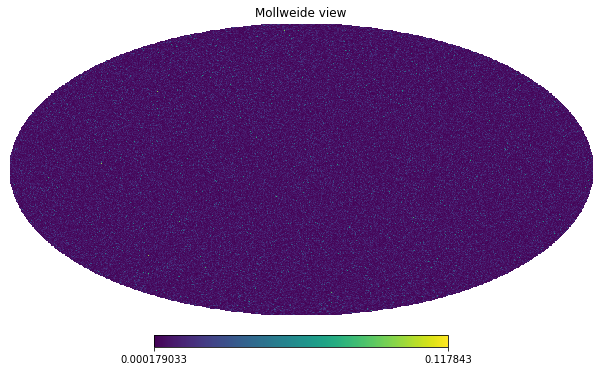

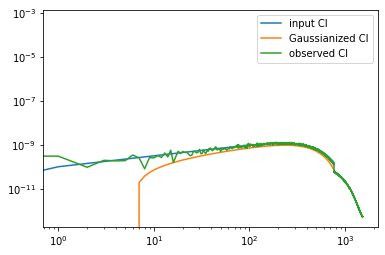

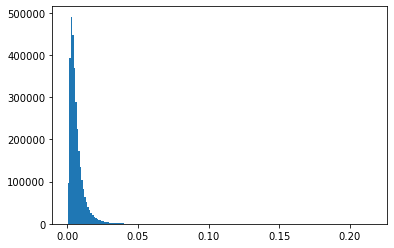

In [8]:
l = arange(0.,Nl)

#ClA = (exp(-l**2/2./20.**2) + 0.3 * exp(-(l-50)**2/2./20.**2))*(l+1)**-2
ClA = (l**0.5 * exp(-l**2/2./320.**2))*1e-10


Cl = array([[ ClA ]])


gaussbar, Clgauss = lognormal_mocks_stats(rhobar,Cl,Ntheta)


mgauss = synfast(Clgauss[0,0],nside)

m = exp(gaussbar[0] + mgauss)

Clm = anafast(m)

close('all')

mollview(m)

figure()
plot(ClA,label='input Cl')
plot(rhobar**2 * Clgauss[0,0],label='Gaussianized Cl')
plot(Clm,label='observed Cl')
loglog()

legend()


figure()
hist(m,200)

show()
